In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bootstrap
%matplotlib inline

## Question 1: Exploring the data - 30 points
In this part, you will explore the data to address the curiosities of the demanding Professor Oak.

1. (6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

In [138]:
pokemon_df = pd.read_csv("pokemon.csv")
combat_df = pd.read_csv("combats.csv")
display(pokemon_df.head())
display(combat_df.head())

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [52]:
pokemon_df.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [53]:
class1 = pokemon_df["Class 1"].unique()
class2 = pokemon_df["Class 2"].unique()
print("Class 1: \n", class1)
print("Class 2: \n", class2)


print("Overall classes: \n", np.unique(class1.tolist()+class2.tolist()))

Class 1: 
 ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Class 2: 
 ['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
Overall classes: 
 ['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water' 'nan']


In [112]:
poke_types = pokemon_df.dtypes
poke_types.name = "type"
int64_df = poke_types[poke_types =="int64"]
object_df = poke_types[poke_types == "object"]
for i in int64_df.keys():
    print(i)

pid
HP
Attack
Defense
Sp. Atk
Sp. Def
Speed


C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

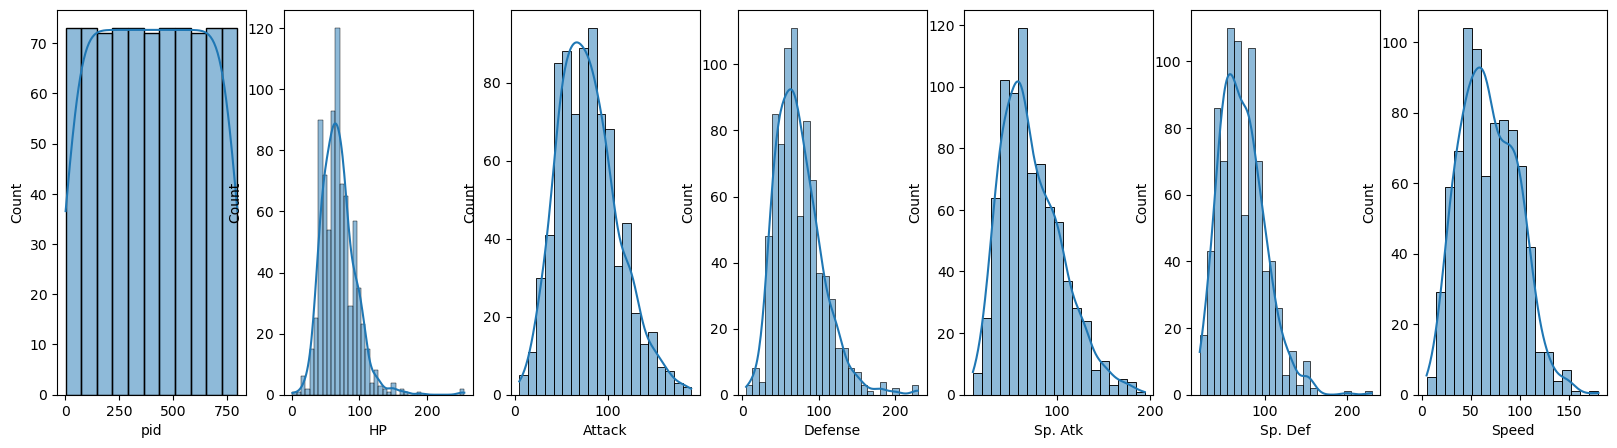

In [122]:
nb_plt = len(int64_df.keys())
fig, axs = plt.subplots(1,nb_plt, figsize=(20,5))
for i, int64_col in enumerate(int64_df.keys()):
    sns.histplot(pokemon_df[int64_col], kde=True, ax=axs[i])

2. (4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,
   1. visualize the relation between these two variables using an appropriate plot;
   2. list the names of the 3 Pokémon with highest attack-over-defense ratio;
   3. list the names of the 3 Pokémon with lowest attack-over-defense ratio;
   4. list the names of the 10 Pokémon with the largest number of victories.

C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: ylabel='Count'>

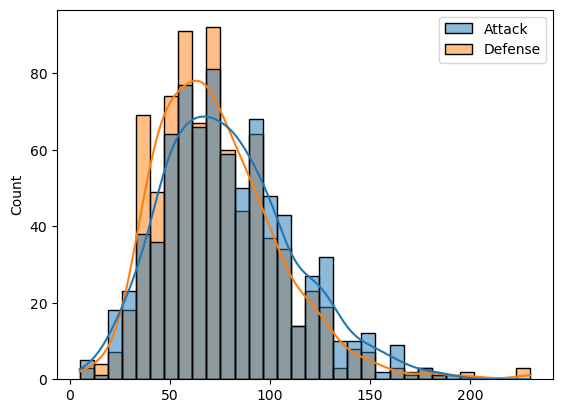

In [129]:
sns.histplot(pokemon_df[["Attack","Defense"]], kde=True)

In [0]:
pokemon_df["Ratio_A/D"] = pokemon_df["Attack"]/pokemon_df["Defense"]

In [136]:
pokemon_df["Ratio_A/D"].sort_values(ascending=False).head(5)

429    9.000
347    4.500
19     3.750
453    3.125
348    3.000
Name: Ratio_A/D, dtype: float64

In [135]:
pokemon_df["Ratio_A/D"].sort_values(ascending=True).head(5)

230    0.043478
139    0.181818
484    0.279070
103    0.281250
616    0.285714
Name: Ratio_A/D, dtype: float64

In [185]:
best_winner_ids = combat_df.groupby("Winner").count().sort_values(by="First_pokemon", ascending=False).index[:10]
pokemon_df.index = pokemon_df["pid"]
pokemon_df.drop("pid", axis=1, inplace=True)
pokemon_df.iloc[best_winner_ids]["Name"]

pid
164          Mega Mewtwo X
155        Mega Aerodactyl
439                 Piplup
429    Deoxys Normal Forme
433                Turtwig
315                Nincada
215               Slowking
395                 Wynaut
250                Kingdra
156                Snorlax
Name: Name, dtype: object

3. (10 points) Professor Oak suspects that Pokémon in the _grass_ class have a stronger regular attack than those in the _rock_ class. Check if he is right and convince him of your conclusion with statistical arguments.
   Note: If there are Pokémon that are in both classes, discard them.
   Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

In [217]:
cl1_grass = pokemon_df[pokemon_df["Class 1"] == "Grass"]
cl2_grass = pokemon_df[pokemon_df["Class 2"] == "Grass"]
cl1_rock = pokemon_df[pokemon_df["Class 1"] == "Rock"]
cl2_rock = pokemon_df[pokemon_df["Class 2"] == "Rock"]

grass_pokemon = pokemon_df.query("(`Class 1` == 'Grass' & `Class 2` != 'Rock') | (`Class 2` == 'Grass' & `Class 1` != 'Rock')" )
rock_pokemon = pokemon_df.query("(`Class 1` == 'Rock' & `Class 2` != 'Grass') | (`Class 2` == 'Rock' & `Class 1` != 'Grass')")

In [222]:
from scipy.stats import bootstrap


#calculate 95% bootstrapped confidence interval for median
grass_bootstrap_ci = bootstrap((grass_pokemon["Attack"],), np.mean, confidence_level=0.95,
                         random_state=1, method='percentile')
rock_bootstrap_ci = bootstrap((rock_pokemon["Attack"],), np.mean, confidence_level=0.95,
                         random_state=1, method='percentile')

print("Grass CI: \t", grass_bootstrap_ci.confidence_interval)
print("Rock CI: \t", rock_bootstrap_ci.confidence_interval)


Grass CI: 	 ConfidenceInterval(low=68.6236559139785, high=78.68817204301075)
Rock CI: 	 ConfidenceInterval(low=83.05357142857143, high=100.94642857142857)


AttributeError: 'BootstrapResult' object has no attribute 'bootstrap_distribution'

In [221]:
from scipy.stats import ttest_ind_from_stats

# Calculate means and standard deviations from the bootstrapped distributions
mean_grass = np.mean(grass_bootstrap_ci.bootstrap_distribution)
std_grass = np.std(grass_bootstrap_ci.bootstrap_distribution)
n_grass = len(grass_bootstrap_ci.bootstrap_distribution)

mean_rock = np.mean(rock_bootstrap_ci.bootstrap_distribution)
std_rock = np.std(rock_bootstrap_ci.bootstrap_distribution)
n_rock = len(rock_bootstrap_ci.bootstrap_distribution)

# Perform the t-test
t_stat, p_value = ttest_ind_from_stats(mean1=mean_grass, std1=std_grass, nobs1=n_grass,
                                       mean2=mean_rock, std2=std_rock, nobs2=n_rock)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

AttributeError: 'BootstrapResult' object has no attribute 'bootstrap_distribution'

4. (10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories.
   Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called `pokemon` and `combats`, with the same schema as the small CSV files you’ve been working with above.


## Question 2: Prediction - 40 points
Now that you know what your data looks like, you are ready to implement the prediction model for the Pokedex 2.0. The model should take as input the features of two Pokémon and generate a binary value to predict who will win.

1. (3 points) Generate the feature vectors and the labels to train your model.

2. (5 points) How does your model handle categorical features and Pokémon with multiple classes?

3. (10 points) Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (`n_estimators`, try values 10, 25, 50, 100) and the maximum tree depth (`max_depth`, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.

4. (5 points) Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?

5. (5 points) Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).

6. (7 points) Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.

7. (5 points) Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.


## Question 3: Ranking - 30 points
Something the new Pokedex is missing is a smart way of ranking the Pokémon. As the dataset Professor Oak gave you contains the outcome of a large number of battles, the idea is to use this data to come up with a way of sorting the Pokémon from strongest to weakest.
1. (5 points) Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.


Pokémon tournaments can be represented as a so-called _dominance graph_. The dominance graph is a directed graph in which each Pokémon is represented by one vertex, and directed edges point from stronger to weaker Pokémons: in particular, if Pokémon _i_ has won a strictly larger number of times against Pokémon _j_ than _j_ has won against _i_ (that is, if _i_ dominates _j_), there is a directed edge pointing from node _i_ to node _j_. The dominance graph can be represented as an adjacency matrix _G_ where entry _G_<sub>_ij_</sub> is 1 if there is an edge pointing from _i_ to _j_, and 0 otherwise.

2. (10 points) A simple method for identifying the strongest Pokémon using this graph is to compute the matrix _A_ = _G_ + _G_<sup>2</sup>. Consider a given row of _A_; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon.

3. (7 points) Compute _A_ and extract the 10 Pokémon with the highest dominance score.

4. (3 points) Compare the ranking by dominance scores with the ranking by winning ratio (cf. subquestion 1 above). What do you observe? How do you explain the differences (if any)?

5. (5 points) Professor Oak is really keen on featuring a solid ranking mechanism in the new Pokedex, so you need to make a decision: Which scoring method is better, that based on winning ratio or that based on dominance scores? Support your opinion with explanations and examples.
